In [1]:
import pandas as pd

In [2]:
#Dataset 1 - Extended-Essay-BR-with-features 
dataset1 = '/home/arbarros/Mestrado/datasets/essay_br_with_features.csv'
extended = pd.read_csv(dataset1)
df = pd.DataFrame(extended)

df

,id,adicao_ratio,conclusao_ratio,correcao_ratio,restricao_ratio,inclusao_ratio,condicao_ratio,resumo_ratio,certeza_ratio,justificativa_ratio,...,simp.similarity_cosine_cbow,simp.similarity_dice,simp.similarity_jaccard,simp.similarity_word_movers_cbow,simp.tf_idf_ngram1,simp.tf_idf_ngram2,simp.tf_idf_ngram3,simp.tf_idf_ngram4,simp.tf_idf_ngram_all,score
0,1,0.047393,0.009479,0.000000,0.000000,0.000000,0.009479,0.0,0.000000,0.000000,...,0.852286,0.266958,0.154040,0.0,0.990,0.936,0.588,0.378,0.965,0
1,2,0.067568,0.006757,0.006757,0.000000,0.000000,0.006757,0.0,0.013514,0.000000,...,0.700030,0.195349,0.108247,0.0,0.985,0.822,0.447,0.291,0.939,0
2,3,0.074074,0.007407,0.000000,0.000000,0.007407,0.007407,0.0,0.000000,0.007407,...,0.661778,0.129032,0.068966,0.0,0.955,0.789,0.375,0.160,0.903,0
3,4,0.042146,0.007663,0.000000,0.000000,0.007663,0.011494,0.0,0.000000,0.003831,...,0.821088,0.268657,0.155172,0.0,0.990,0.901,0.513,0.292,0.959,0
4,5,0.048309,0.009662,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.024155,...,0.829396,0.267303,0.154270,0.0,0.993,0.897,0.569,0.442,0.960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,6573,0.052326,0.005814,0.000000,0.000000,0.000000,0.017442,0.0,0.000000,0.017442,...,0.669729,0.257778,0.147959,0.0,0.977,0.812,0.393,0.145,0.921,520
6559,6574,0.048193,0.000000,0.000000,0.004016,0.000000,0.016064,0.0,0.000000,0.016064,...,0.571261,0.236641,0.134199,0.0,0.963,0.817,0.430,0.195,0.916,480
6560,6575,0.043165,0.003597,0.000000,0.003597,0.003597,0.010791,0.0,0.000000,0.010791,...,0.789959,0.270073,0.156118,0.0,0.989,0.873,0.544,0.361,0.953,600
6561,6576,0.039711,0.003610,0.000000,0.003610,0.000000,0.010830,0.0,0.000000,0.007220,...,0.610612,0.213523,0.119522,0.0,0.969,0.829,0.462,0.252,0.923,360


In [24]:
# Required Libraries
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
def load_dataset(file_path):
    dataset = pd.read_csv(file_path)
    return dataset

# Distribution Analysis
def analyze_score_distribution(dataset):
    score_distribution = dataset['score']
    bins = [0, 200, 400, 600, 800, 1000]
    score_distribution_bins = pd.cut(score_distribution, bins=bins, right=False)
    bin_counts = score_distribution_bins.value_counts().sort_index()
    return bin_counts

# PCA and Clustering
def perform_pca_and_clustering(dataset):
    features = dataset.drop(columns=["id", "score"])
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)
    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features_pca)
    dataset['cluster'] = clusters
    return dataset, features_pca, clusters

# Plot Clusters
def plot_clusters(features_pca, clusters):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=features_pca[:, 0],
        y=features_pca[:, 1],
        hue=clusters,
        palette="Set2",
        alpha=0.7,
    )
    plt.title("Clusters Baseados em Features (Redução PCA)", fontsize=16)
    plt.xlabel("Componente Principal 1", fontsize=12)
    plt.ylabel("Componente Principal 2", fontsize=12)
    plt.legend(title="Cluster")
    plt.grid(alpha=0.3)
    plt.show()

# Correlation Analysis
def analyze_feature_correlations(dataset):
    correlations = dataset.corr()["score"].sort_values(ascending=False)
    top_positive = correlations.head(11)
    top_negative = correlations.tail(10)
    return pd.concat([top_positive, top_negative])

# Heatmap for Top Correlations
def plot_correlation_heatmap(dataset, top_correlations):
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        dataset[top_correlations.index].corr(),
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
    )
    plt.title("Heatmap de Correlações (Principais Features e Score)", fontsize=16)
    plt.show()

# Generate Synthetic Essay
def generate_synthetic_essay(score_target):
    introduction = (
        "A educação é um pilar essencial para o desenvolvimento de uma sociedade justa e igualitária. "
        "No entanto, no Brasil, o acesso à educação de qualidade enfrenta desafios significativos, como "
        "a desigualdade social e a falta de investimentos."
    )
    
    development_1 = (
        "Por um lado, as desigualdades regionais dificultam a universalização do ensino, especialmente "
        "em áreas rurais e comunidades vulneráveis. A ausência de infraestrutura e professores qualificados "
        "perpetua o ciclo de exclusão social."
    )
    
    development_2 = (
        "Além disso, o investimento público em educação é insuficiente para atender às demandas de um sistema "
        "cada vez mais sobrecarregado. A valorização dos professores e a ampliação de políticas inclusivas são "
        "estratégias fundamentais para enfrentar esses desafios."
    )
    
    conclusion = (
        "Portanto, é indispensável que o governo priorize investimentos em educação e que a sociedade civil participe "
        "ativamente desse processo. Só assim será possível construir uma nação onde o acesso ao conhecimento seja um direito "
        "efetivamente garantido para todos."
    )
    
    if score_target < 500:
        introduction = introduction.replace("desafios significativos", "problemas grandes")
        development_1 = development_1.replace("universalização do ensino", "melhora na educação")
        conclusion = conclusion.replace("indispensável", "muito importante")
    
    elif score_target > 800:
        development_2 += (
            " Além disso, é essencial que as escolas contemplem a diversidade cultural do país, promovendo o respeito "
            "aos direitos humanos e à pluralidade."
        )
        conclusion += " Essa abordagem fortalece os pilares de uma sociedade justa e inclusiva."
    
    essay = "\n\n".join([introduction, development_1, development_2, conclusion])
    return essay


Dataset balanceado salvo como 'balanced_dataset.csv'


In [ ]:
# Este dataset possui 6563 linhas x 358 colunas . Cada coluna representa uma features extraída por técncias de extração de features PLN.
# Coluna score representa o target 
# Considerando que removi algumas redações por inconsistências, meu dataset limpo ficou com 6536 redações, porém não tem como excluir essas redações apenas pelo id

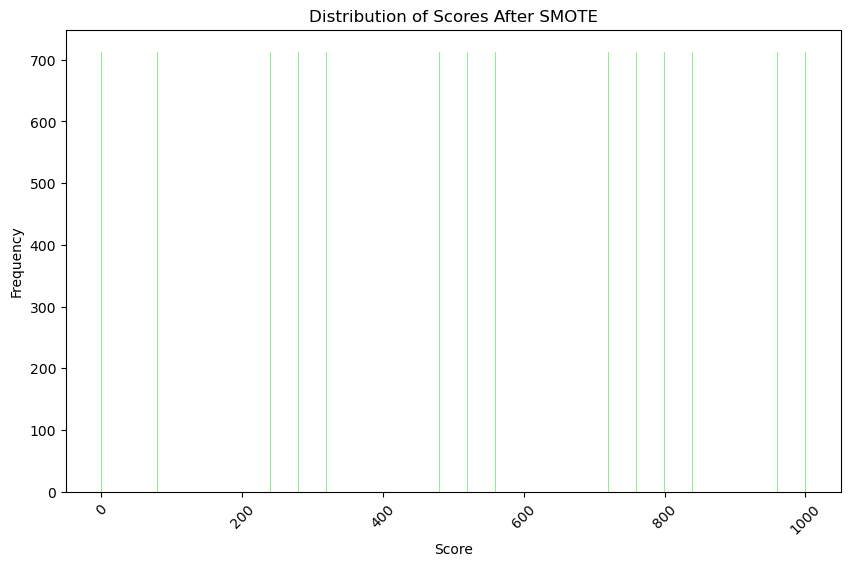

In [19]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop(columns=['id', 'score'])  # Remove 'id' and 'score' for feature set
y = df['score']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42, k_neighbors = 3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for analysis
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['score'])], axis=1)

# Analyze the distribution of 'score' after SMOTE
balanced_score_distribution = balanced_data['score'].value_counts().sort_index()

# Plot the distribution after SMOTE
plt.figure(figsize=(10, 6))
plt.bar(balanced_score_distribution.index, balanced_score_distribution.values, color='lightgreen')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores After SMOTE')
plt.xticks(rotation=45)
plt.show()


In [8]:
#Dataset 2 - Extended-Essay-BR-with-features balanceado 
dataset2 = '/home/arbarros/Mestrado/datasets/dataset_balanceado.csv'
balanceado = pd.read_csv(dataset2)
df_balanceado = pd.DataFrame(balanceado)

df_balanceado

,id,adicao_ratio,conclusao_ratio,correcao_ratio,restricao_ratio,inclusao_ratio,condicao_ratio,resumo_ratio,certeza_ratio,justificativa_ratio,...,simp.similarity_cosine_cbow,simp.similarity_dice,simp.similarity_jaccard,simp.similarity_word_movers_cbow,simp.tf_idf_ngram1,simp.tf_idf_ngram2,simp.tf_idf_ngram3,simp.tf_idf_ngram4,simp.tf_idf_ngram_all,score
0,1,0.047393,0.009479,0.000000,0.000000,0.000000,0.009479,0.000000,0.000000,0.000000,...,0.852286,0.266958,0.154040,0.0,0.990000,0.936000,0.588000,0.378000,0.965000,0
1,2,0.067568,0.006757,0.006757,0.000000,0.000000,0.006757,0.000000,0.013514,0.000000,...,0.700030,0.195349,0.108247,0.0,0.985000,0.822000,0.447000,0.291000,0.939000,0
2,3,0.074074,0.007407,0.000000,0.000000,0.007407,0.007407,0.000000,0.000000,0.007407,...,0.661778,0.129032,0.068966,0.0,0.955000,0.789000,0.375000,0.160000,0.903000,0
3,4,0.042146,0.007663,0.000000,0.000000,0.007663,0.011494,0.000000,0.000000,0.003831,...,0.821088,0.268657,0.155172,0.0,0.990000,0.901000,0.513000,0.292000,0.959000,0
4,5,0.048309,0.009662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024155,...,0.829396,0.267303,0.154270,0.0,0.993000,0.897000,0.569000,0.442000,0.960000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,5987,0.051284,0.002944,0.000000,0.001472,0.000000,0.006210,0.001794,0.003266,0.005381,...,0.793656,0.259652,0.149306,0.0,0.991000,0.892724,0.535851,0.332526,0.956161,1000
17821,4560,0.067533,0.004108,0.000000,0.000000,0.004783,0.006152,0.000000,0.001369,0.014328,...,0.842779,0.284191,0.165676,0.0,0.992648,0.919295,0.615490,0.416453,0.968648,1000
17822,4552,0.062957,0.003061,0.000000,0.003061,0.006122,0.005376,0.000000,0.000000,0.012905,...,0.913011,0.239928,0.136407,0.0,0.994874,0.927390,0.638042,0.371695,0.975000,1000
17823,4550,0.044349,0.010952,0.000000,0.000049,0.007236,0.011345,0.000000,0.003618,0.011050,...,0.794593,0.296390,0.174036,0.0,0.987095,0.908446,0.618493,0.395695,0.963159,1000


In [9]:
def gerar_redacao(features):
    texto = []

    # Criar regras para mapear as features
    complexidade = features.get('complexidade_lexical', 0.5)
    conectores = features.get('uso_conectores', 0.5)
    coerencia = features.get('coerencia_textual', 0.5)

    if complexidade > 0.7:
        texto.append("O texto apresenta vocabulário rico e variado.")
    else:
        texto.append("O texto utiliza linguagem mais simples e direta.")

    if conectores > 0.7:
        texto.append("Além disso, conectores são usados de forma consistente para ligar as ideias.")
    else:
        texto.append("A transição entre ideias poderia ser mais fluida.")

    if coerencia > 0.7:
        texto.append("A argumentação é clara e bem estruturada.")
    else:
        texto.append("Há alguns pontos que dificultam a clareza da argumentação.")

    return " ".join(texto)

# Aplicar a geração para cada linha no dataset balanceado
redacoes_sinteticas = []
for _, row in df_resampled.iterrows():
    features = row.to_dict()
    redacao = gerar_redacao(features)
    redacoes_sinteticas.append({'texto': redacao, 'score': row['score']})

# Criar um DataFrame com os textos gerados
df_redacoes = pd.DataFrame(redacoes_sinteticas)
df_redacoes.to_csv('redacoes_sinteticas.csv', index=False)
print("Redações sintéticas salvas como 'redacoes_sinteticas.csv'.")


Redações sintéticas salvas como 'redacoes_sinteticas.csv'.


In [13]:
#Dataset 3 - Extended-Essay-BR-with-features balanceado 
dataset3 = '/home/arbarros/Mestrado/datasets/redacoes_sinteticas.csv'
sinteticas = pd.read_csv(dataset3)
df_sinteticas = pd.DataFrame(sinteticas)

df_sinteticas

,texto,score
0,O texto utiliza linguagem mais simples e diret...,0.0
1,O texto utiliza linguagem mais simples e diret...,0.0
2,O texto utiliza linguagem mais simples e diret...,0.0
3,O texto utiliza linguagem mais simples e diret...,0.0
4,O texto utiliza linguagem mais simples e diret...,0.0
...,...,...
17820,O texto utiliza linguagem mais simples e diret...,1000.0
17821,O texto utiliza linguagem mais simples e diret...,1000.0
17822,O texto utiliza linguagem mais simples e diret...,1000.0
17823,O texto utiliza linguagem mais simples e diret...,1000.0
